In [133]:
#from google.colab import drive 
#drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb
from wordcloud import WordCloud,STOPWORDS

In [2]:
df = pd.read_csv("train.tsv",delimiter='\t')

In [3]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
df.head()

,drugName,condition,review,rating,date,usefulCount
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


In [5]:
df.loc[0:2,'condition'].apply(lambda x:type(x))

0    <class 'str'>
1    <class 'str'>
2    <class 'str'>
Name: condition, dtype: object

**most common condition**

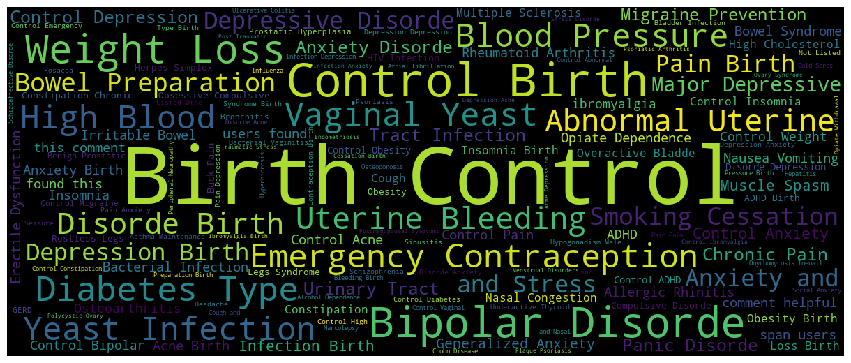

In [6]:
stop = set(STOPWORDS)
long_string=""
wc=WordCloud(max_words=150,min_font_size=7,background_color='black',stopwords=stop,width = 1200, height = 500)
long_string =','.join(df['condition'].astype(str))
#Generating wordlcoud
wc.generate(long_string)

#Show wordcloud
plt.figure(figsize=(15,30))
plt.imshow(wc)
plt.axis("off")
plt.show()

**most popular drug**

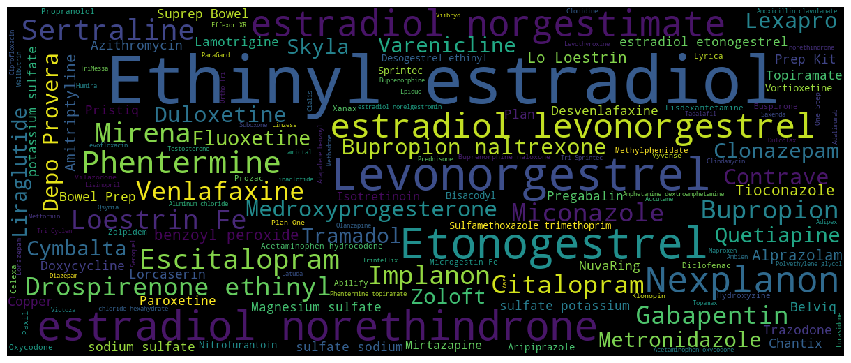

In [7]:
drugName=""
drugName =','.join(df['drugName'].astype(str)) 

# Create a WordCloud object
wc_drug=WordCloud(max_words=150,min_font_size=7,background_color='black',stopwords=stop,width = 1200, height = 500)

# Generate a word cloud
wc_drug.generate(drugName)

#Show wordcloud
plt.figure(figsize=(15,30))
plt.imshow(wc_drug)
plt.axis("off")
plt.show()

In [8]:
# checking the most common conditions in patients
px.bar(df['condition'].value_counts()[:10],y='condition',x=df['condition'].value_counts().index[:10],title='Most Common Conditions')

NameError: name 'px' is not defined

**Drugs with the best reviews**

In [208]:
drg_best=df.groupby(['drugName','rating']).count()
drg_best=drg_best.sort_values(by=['rating','usefulCount'],ascending=[False,False])
drg_best=drg_best.reset_index()

fig=px.bar(drg_best[:10],x=drg_best['drugName'][:10],y='usefulCount',title='Drugs with the most 10 star rating')
figsize=(10,40)
fig.show()

**Conditions with most number of drugs in the market** 

In [232]:
no_of_drugs = df.groupby(['condition'])['drugName'].nunique().sort_values(ascending=False)
no_of_drugs=no_of_drugs.reset_index()
no_of_drugs=no_of_drugs[no_of_drugs['condition']!='Not Listed / Othe']

fig=px.bar(no_of_drugs[:10],y=no_of_drugs['drugName'][:10],x=no_of_drugs['condition'][:10],title='Conditions with most number of drugs in the market')
figsize=(10,40)
fig.show()

**Time Series Analysis**

In [ ]:
import plotly.express as px
ts=['date','rating','condition']
ts=pd.DataFrame(df,columns=ts)
ts['date']=pd.to_datetime(ts['date'])
ts['rating']=ts['rating'].astype(int)

In [ ]:
ts_review_year=ts[['date','rating']].groupby([pd.Grouper(key='date',freq='Y')]).mean()

In [ ]:
fig=px.line(ts_review_year,x=ts_review_year.index,y=ts_review_year['rating'],title='Drug Rating over the years')
fig.show()

**Birth control constitutes 36% if the data .Thus we take a look at how prominent has the birth control  been over the years**

In [ ]:
ts_birth_control=ts[ts.condition=='Birth Control']
ts_birth_conrol_condition_occurence=ts_birth_control[['condition','date']].groupby([pd.Grouper(key='date',freq='Y')]).count()


**Abortion has peaked lately**

In [ ]:
fig=px.line(ts_birth_conrol_condition_occurence ,x=ts_birth_conrol_condition_occurence.index,y=ts_birth_conrol_condition_occurence['condition'],title='Occurnece of Birth Control over the Years')
fig.show()

**ratings**

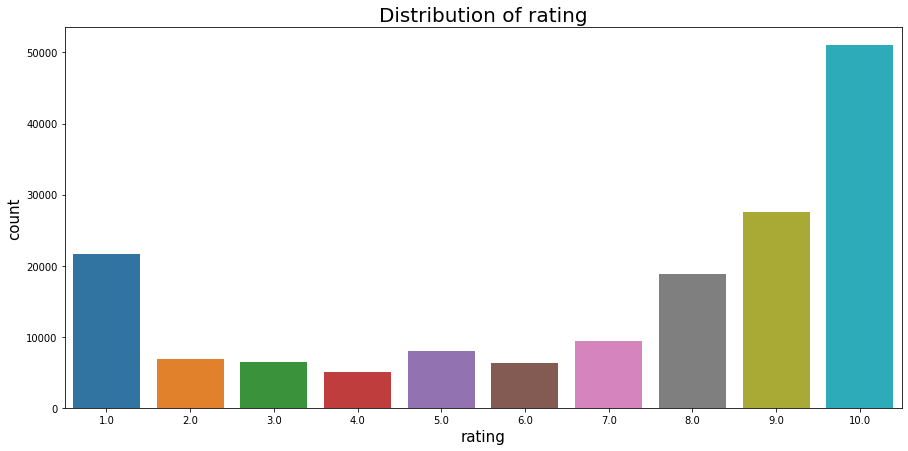

In [ ]:
plt.figure(figsize=(15,7))
sb.countplot(df['rating'])
plt.title('Distribution of rating',fontsize=20)
plt.xlabel('rating',fontsize=15)
plt.ylabel('count',fontsize=15)
plt.show()

In [ ]:
# feature engineering 
# let's make a new column review sentiment 
df.loc[(df['rating'] >7), 'Sentiment'] = 'positive'
df.loc[(df['rating'] < 4), 'Sentiment'] = 'negative'
df.loc[(df['rating'] >= 4) & (df['rating']<=7), 'Sentiment'] = 'neutral'

counts=df['Sentiment'].value_counts()
df_dist_sentiments=pd.DataFrame(counts)

In [ ]:
# a pie chart to represent the sentiments of the patients
fig=px.pie(df_dist_sentiments,names=df_dist_sentiments.index,values=counts)
fig.show()

**How are Sentiments chaning every year**

In [ ]:
ts_sent=pd.DataFrame(df)
ts_sent['date']=pd.to_datetime(ts_sent['date'])

In [ ]:
ts_sent_pos=ts_sent[ts_sent['Sentiment']=='positive']
ts_sent_neutral=ts_sent[ts_sent['Sentiment']=='neutral']
ts_sent_neg=ts_sent[ts_sent['Sentiment']=='negative']

ts_sent_pos=(ts_sent_pos[['date','Sentiment']].groupby([pd.Grouper(key='date',freq='Y')]).count())/(ts_sent[['date','Sentiment']].groupby([pd.Grouper(key='date',freq='Y')]).count())*100
ts_sent_neg=(ts_sent_neg[['date','Sentiment']].groupby([pd.Grouper(key='date',freq='Y')]).count())/(ts_sent[['date','Sentiment']].groupby([pd.Grouper(key='date',freq='Y')]).count())*100
ts_sent_neutral=(ts_sent_neutral[['date','Sentiment']].groupby([pd.Grouper(key='date',freq='Y')]).count())/(ts_sent[['date','Sentiment']].groupby([pd.Grouper(key='date',freq='Y')]).count())*100


In [ ]:
fig=px.line(ts_sent_pos,x=ts_sent_pos.index,y=ts_sent_pos['Sentiment'],title='Ratio of Positive Sentiments every year')
fig.show()

In [ ]:
fig=px.line(ts_sent_neg,x=ts_sent_neg.index,y=ts_sent_neg['Sentiment'],title='Ratio of Negative Sentiments every year')
fig.show()

In [ ]:
fig=px.line(ts_sent_neutral,x=ts_sent_neutral.index,y=ts_sent_neutral['Sentiment'],title='Ratio of Neutral Sentiments every year')
fig.show()

**exploring data**

**plotting most important words**<br/>
https://medium.com/@cristhianboujon/how-to-list-the-most-common-words-from-text-corpus-using-scikit-learn-dad4d0cab41d

In [ ]:
def get_top_n_words(corpus, ngram=(1,1)):
    vec = CountVectorizer(stop_words = 'english', ngram_range=ngram, lowercase=True).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:40]

**unigram**

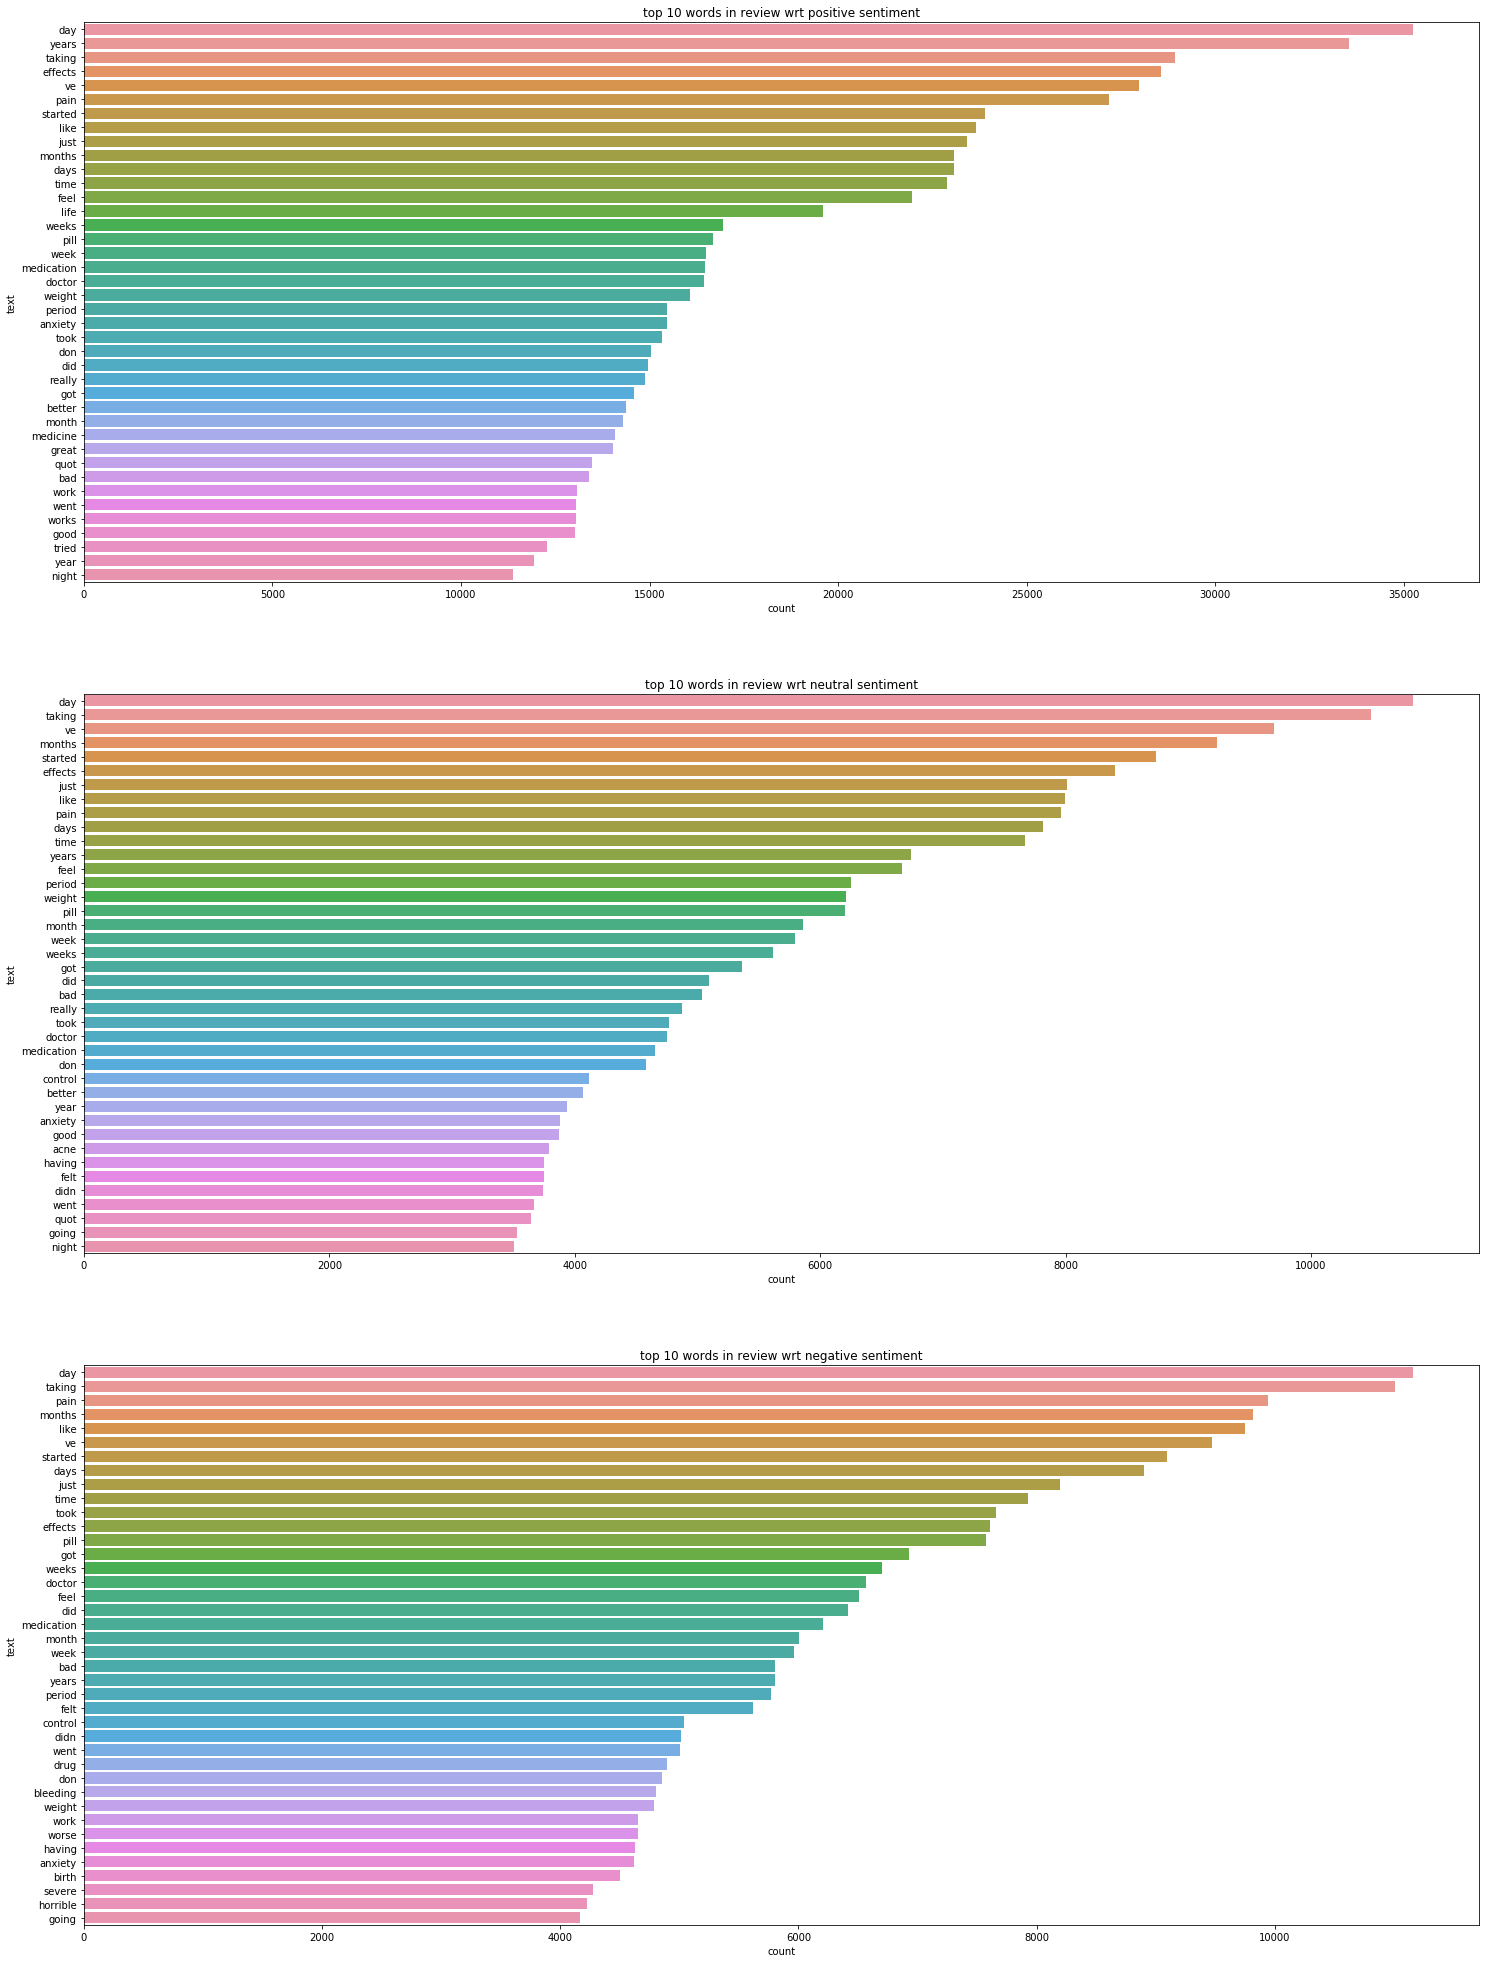

In [ ]:
df_pos_1 = pd.DataFrame(get_top_n_words(df['review'][df['Sentiment'] == 'positive']),columns=['text','count'])
df_neu_1 = pd.DataFrame(get_top_n_words(df['review'][df['Sentiment'] == 'neutral']), columns=['text','count'])
df_neg_1 = pd.DataFrame(get_top_n_words(df['review'][df['Sentiment'] == 'negative']),columns=['text','count'])

plt.figure(figsize=(25,35))

plt.subplot(3,1,1)
sb.barplot(y='text',x='count',data=df_pos_1)
plt.title('top 10 words in review wrt positive sentiment')

plt.subplot(3,1,2)
sb.barplot(y='text',x='count',data=df_neu_1)
plt.title('top 10 words in review wrt neutral sentiment')

plt.subplot(3,1,3)
sb.barplot(y='text',x='count',data=df_neg_1)
plt.title('top 10 words in review wrt negative sentiment')

plt.show()

**bigram**

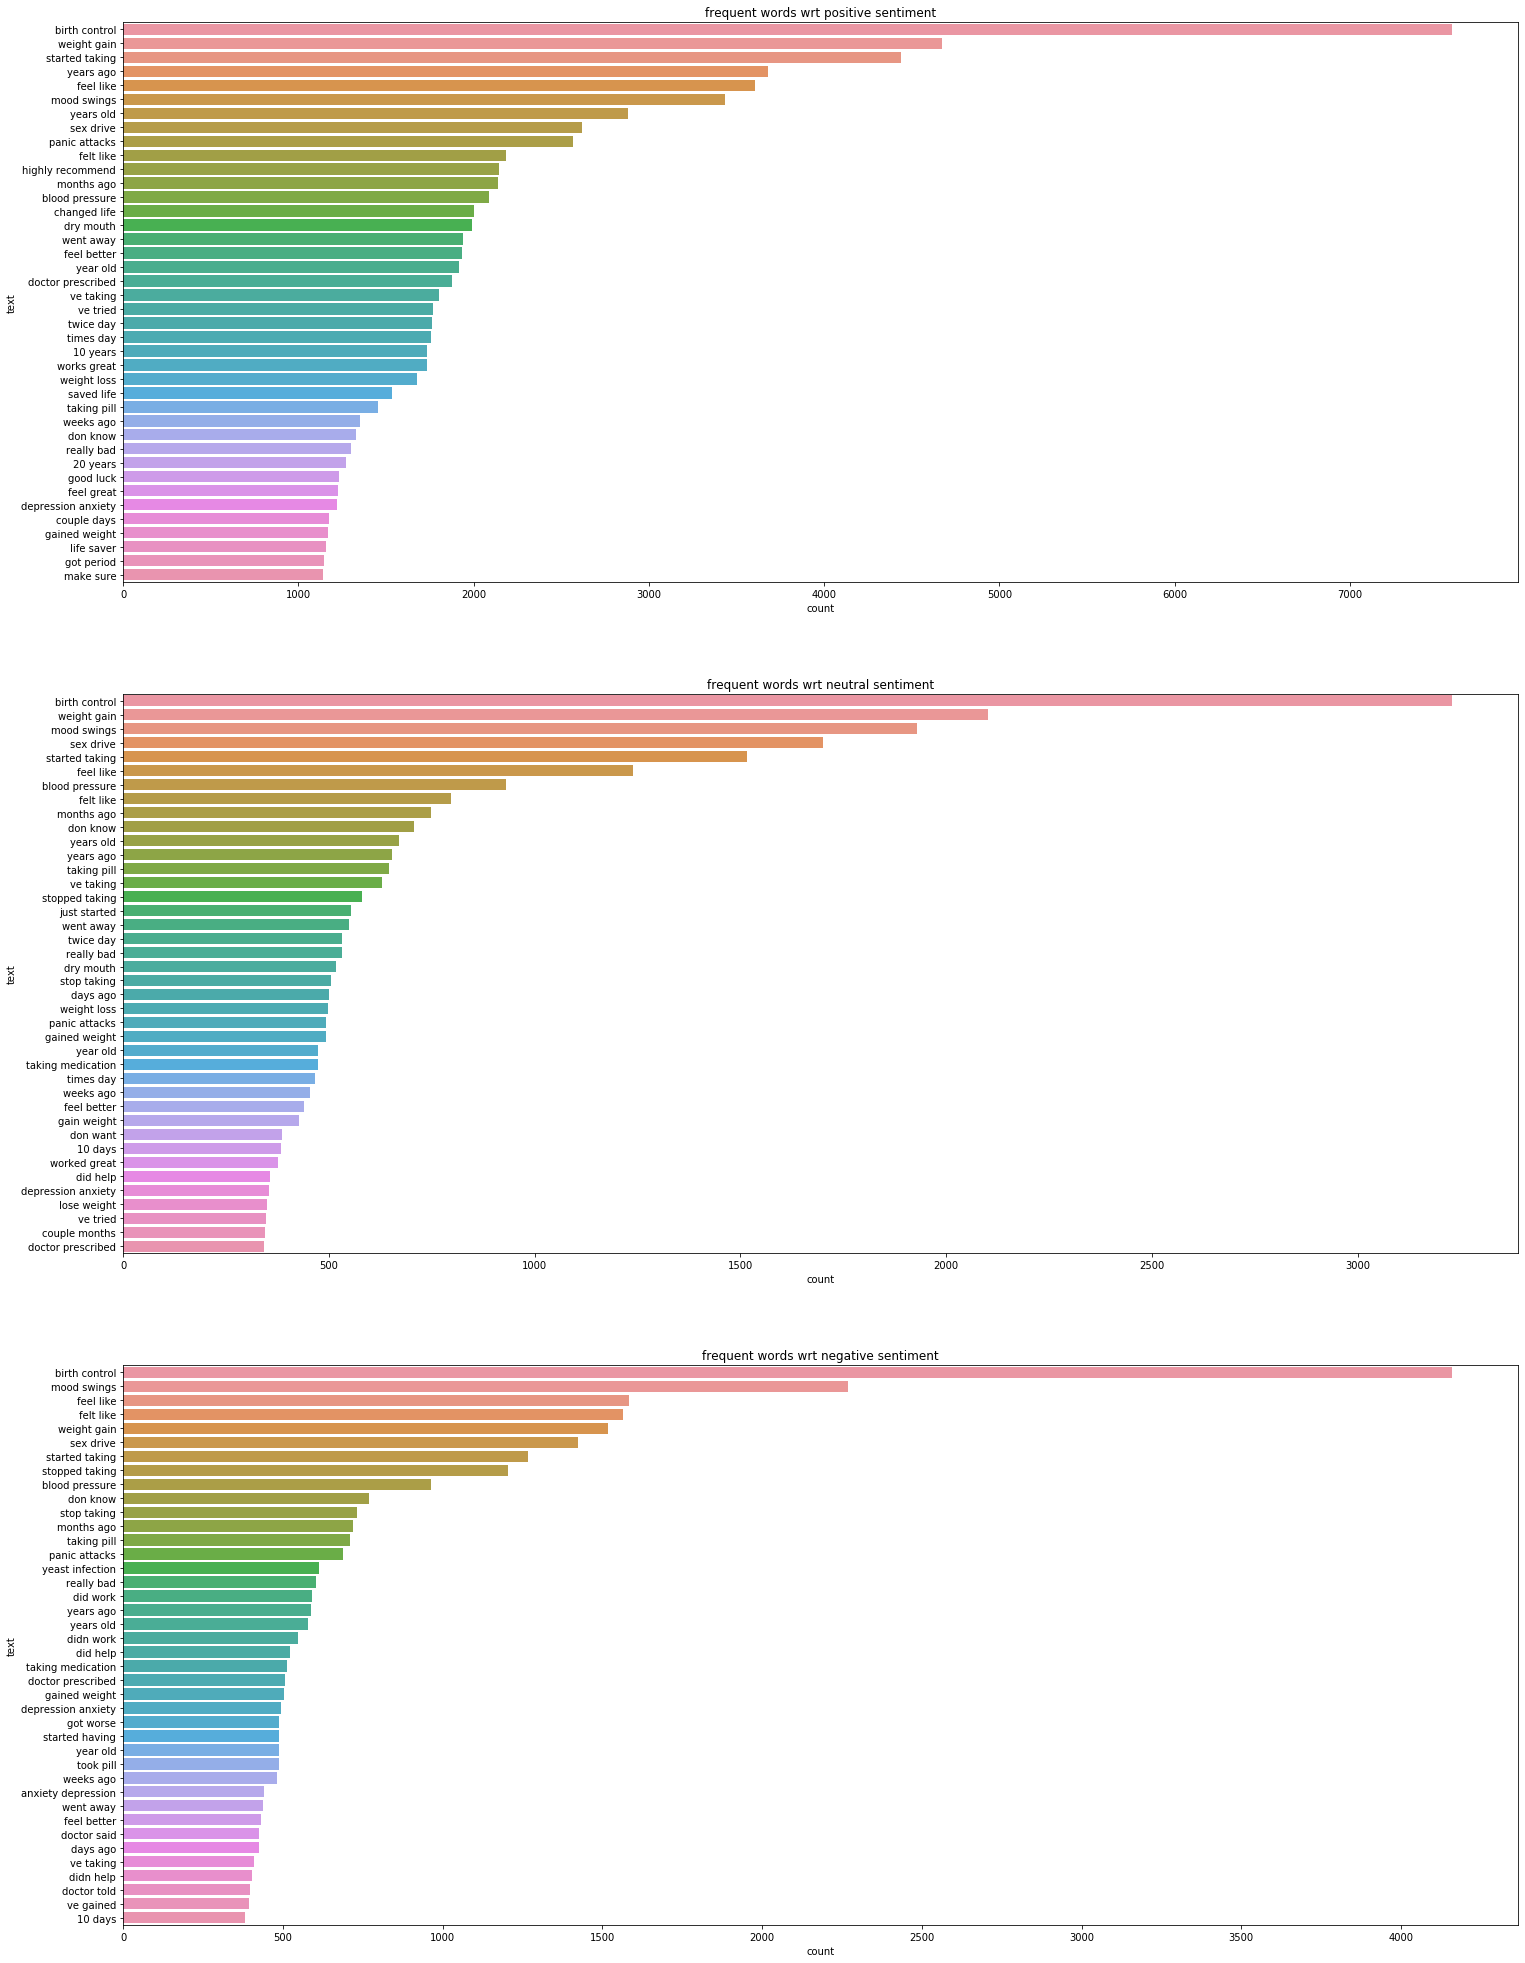

In [ ]:
df_pos_2 = pd.DataFrame(get_top_n_words(df['review'][df['Sentiment'] == 'positive'],ngram=(2,2)),columns=['text','count'])
df_neu_2 = pd.DataFrame(get_top_n_words(df['review'][df['Sentiment'] == 'neutral'],ngram=(2,2)), columns=['text','count'])
df_neg_2 = pd.DataFrame(get_top_n_words(df['review'][df['Sentiment'] == 'negative'],ngram=(2,2)),columns=['text','count'])

plt.figure(figsize=(25,35))

plt.subplot(3,1,1)
sb.barplot(y='text',x='count',data=df_pos_2)
plt.title('frequent words wrt positive sentiment')

plt.subplot(3,1,2)
sb.barplot(y='text',x='count',data=df_neu_2)
plt.title('frequent words wrt neutral sentiment')

plt.subplot(3,1,3)
sb.barplot(y='text',x='count',data=df_neg_2)
plt.title('frequent words wrt negative sentiment')

plt.show()

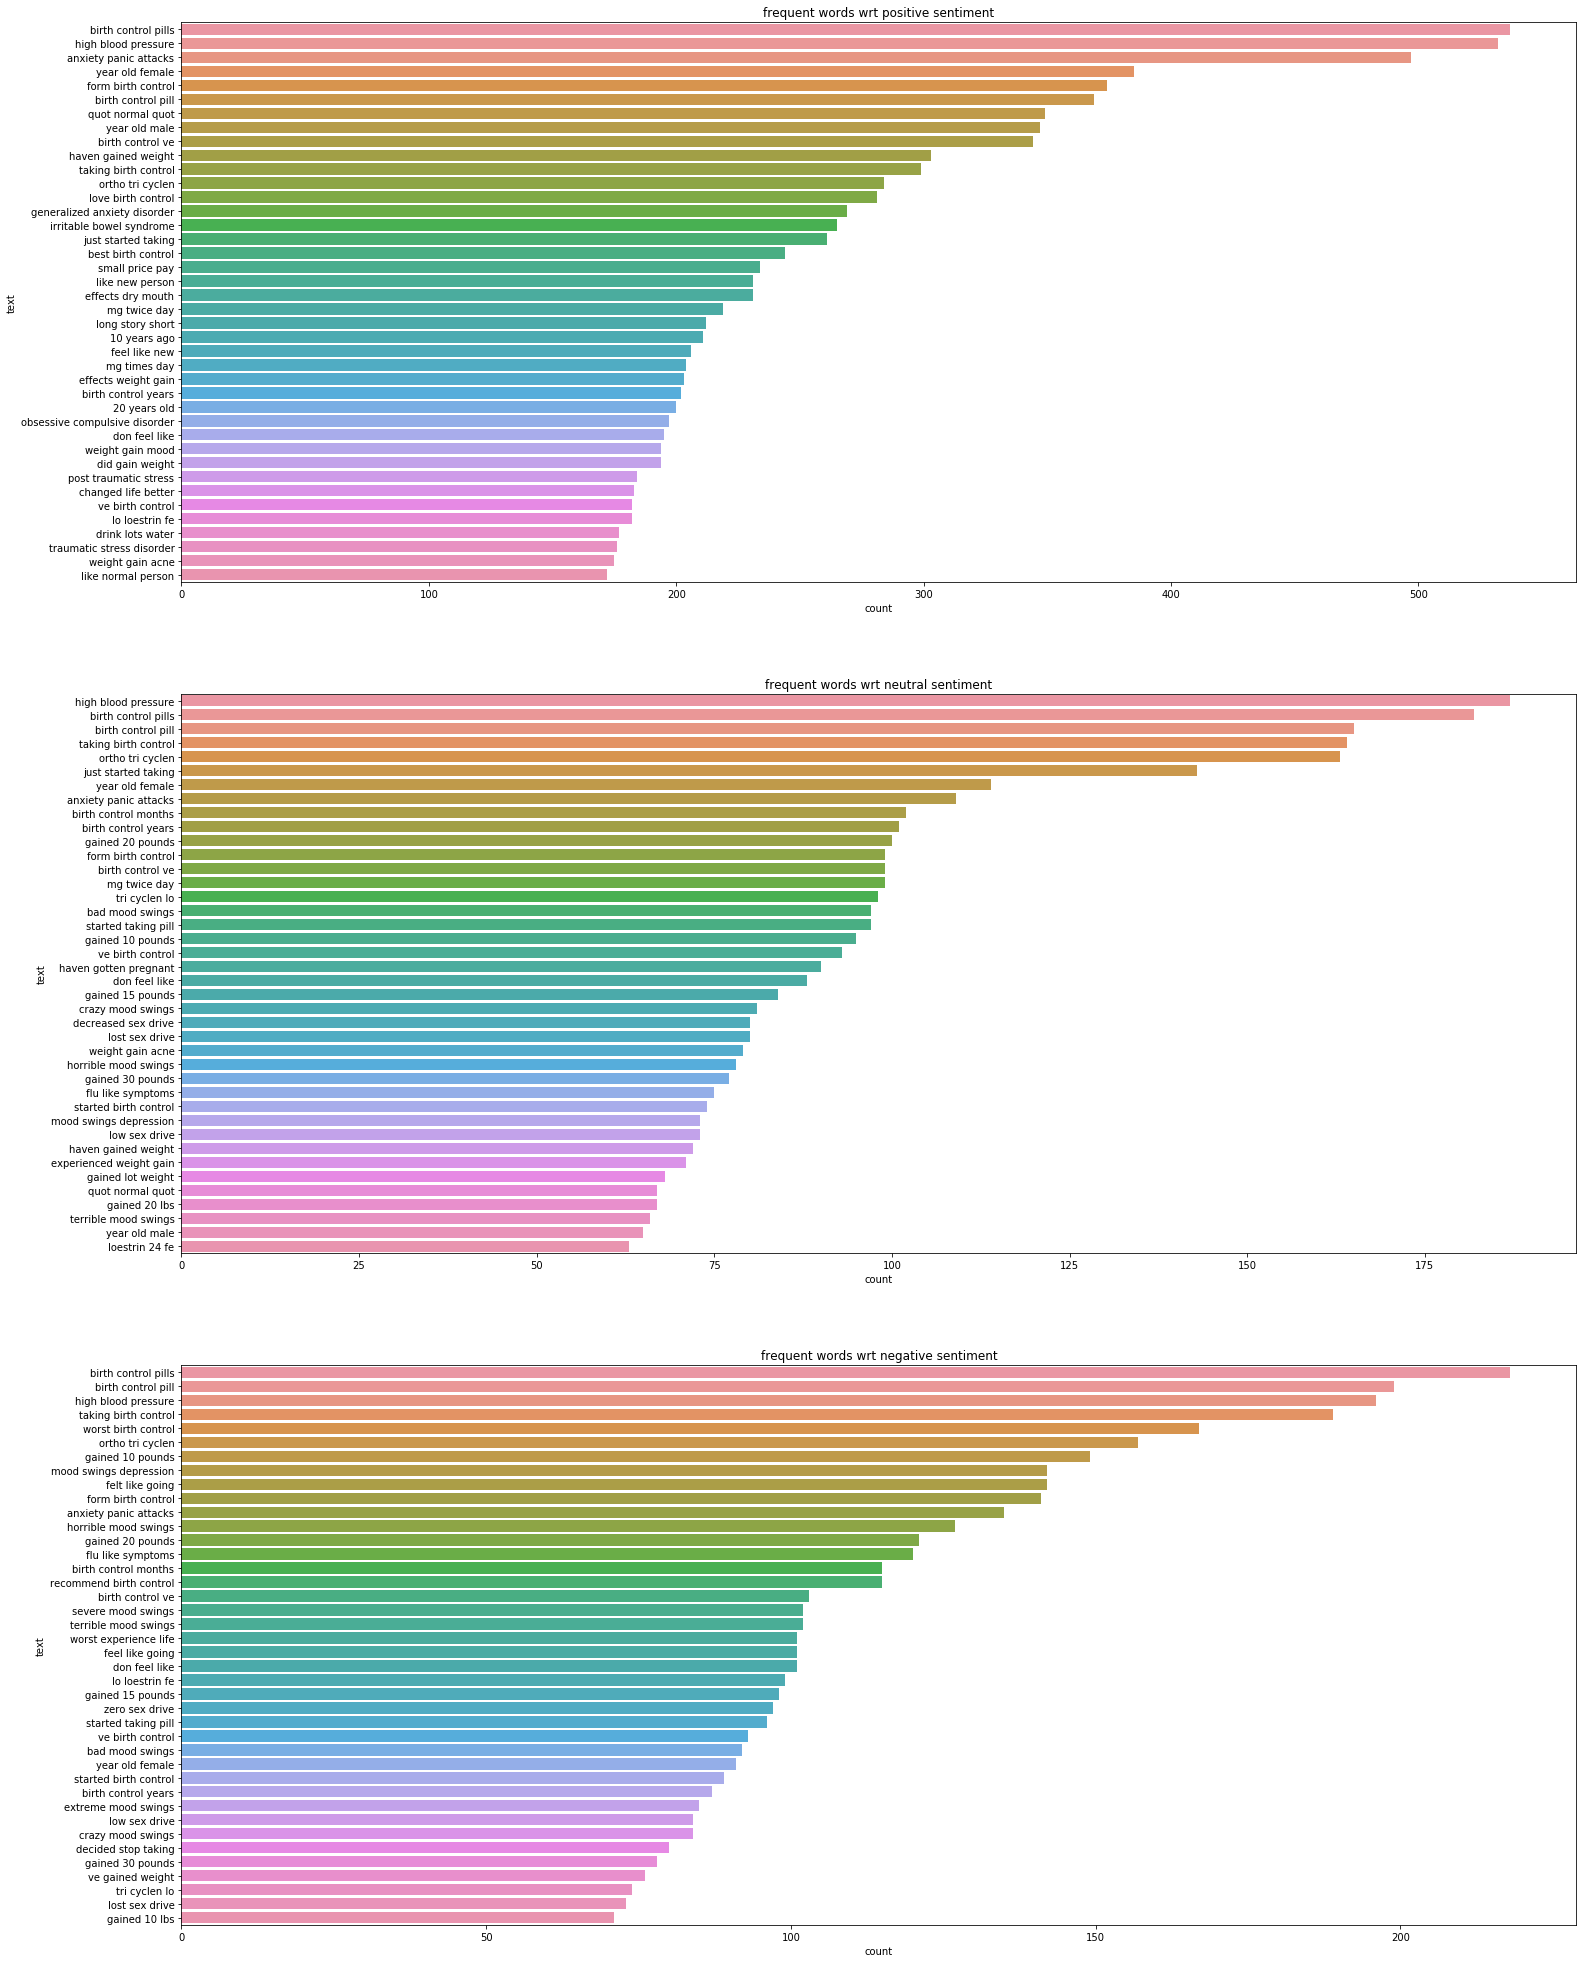

In [ ]:
df_pos_3 = pd.DataFrame(get_top_n_words(df['review'][df['Sentiment'] == 'positive'],ngram=(3,3)),columns=['text','count'])
df_neu_3 = pd.DataFrame(get_top_n_words(df['review'][df['Sentiment'] == 'neutral'],ngram=(3,3)), columns=['text','count'])
df_neg_3 = pd.DataFrame(get_top_n_words(df['review'][df['Sentiment'] == 'negative'],ngram=(3,3)),columns=['text','count'])

plt.figure(figsize=(25,35))

plt.subplot(3,1,1)
sb.barplot(y='text',x='count',data=df_pos_3)
plt.title('frequent words wrt positive sentiment')

plt.subplot(3,1,2)
sb.barplot(y='text',x='count',data=df_neu_3)
plt.title('frequent words wrt neutral sentiment')

plt.subplot(3,1,3)
sb.barplot(y='text',x='count',data=df_neg_3)
plt.title('frequent words wrt negative sentiment')

plt.show()